In [68]:
import numpy as np
import pandas as pd

#for data visuazation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity 
from ipywidgets import interact 

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


L o a d   t h e   D a t a s e t


In [69]:
data = pd.read_csv('data (1).csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


U n d e r s t a n d i n g     t h e     D a t a s e t


In [70]:
data.shape

(2200, 8)

In [71]:
# checking the columns Names
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [72]:
# checking dataset data of first 10 rows by using head function.. 
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


H a n d l i n g   M i s s i n g   V a l u e s

In [73]:
#checking null values to prevent errors
print(data.isnull().sum())

#we can do it without print function as well..
data.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [74]:
# checking the crops preset in our dataset and quantity of it..
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [75]:
# checking the summary of all crops
print("Average Ratio of Nitrogen in the soil :", (data['N'].mean()))
print('Average Ratio of Nitrogen in the soil : {0:2f}'.format(data['N'].mean())) # 0:2f decimals gie less
print('Average Ratio of Phosphorous  in the soil : {0:2f}'.format(data['P'].mean()))
print('Average Ratio of Potassium   in the soil : {0:2f}'.format(data['K'].mean()))
print('Average Temperature in Celsius : {0:2f}'.format(data['temperature'].mean()))
print('Average Relative Humidity in % : {0:2f}'.format(data['humidity'].mean()))
print('Average PH value of the soil:{0:2f}'.format(data['ph'].mean()))
print('Average Rainfall in mm: {0:2f}'.format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.551818181818184
Average Ratio of Nitrogen in the soil : 50.551818
Average Ratio of Phosphorous  in the soil : 53.362727
Average Ratio of Potassium   in the soil : 48.149091
Average Temperature in Celsius : 25.616244
Average Relative Humidity in % : 71.481779
Average PH value of the soil:6.469480
Average Rainfall in mm: 103.463655


S u m m a r y   S t a t i s t i c s   f o r   e v e r y   C r o p s

In [76]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print('-------------------------------------------------')
    print('Statistics for Nitrogen')
    print('Minimum Nitrogen Reguired :', x['N'].min())
    print('Average Nitrogen Required :', x['N'].mean())
    print('Maximum Nitrogen Required :', x['N'].max())
    print('-------------------------------------------------')
    print('Statistics for Phosphorous')
    print('Minimum Phosphorous Reguired :', x['P'].min())
    print('Average Phosphorous Required :', x['P'].mean())
    print('Maximum Phosphorous Required :', x['P'].max())
    print('-------------------------------------------------')
    print('Statistics for Potassium')
    print('Minimum Potassium Reguired :', x['K'].min())
    print('Average Potassium Required :', x['K'].mean())
    print('Maximum Potassium Required :', x['K'].max())
    print('-------------------------------------------------')
    print('Statistics for Temperature')
    print('Minimum Temperature Reguired : (0:.2f)'.format(x['temperature'].min()))
    print('Average Temperature Required : (0:.2f)'.format( x['temperature'].mean()))
    print('Maximum Temperature Required : (0:.2f)'.format( x['temperature'].max()))
    print('-------------------------------------------------')
    print('Statistics for Humidity')
    print('Minimum Humidity Reguired : (0:.2f)'.format(x['humidity'].min()))
    print('Average Humidity Required : (0:.2f)'.format( x['humidity'].mean()))
    print('Maximum Humidity Required : (0:.2f)'.format( x['humidity'].max()))
    print('-------------------------------------------------')
    print('Statistics for PH')
    print('Minimum PH Reguired : (0:.2f)'.format(x['ph'].min()))
    print('Average PH Required : (0:.2f)'.format( x['ph'].mean()))
    print('Maximum PH Required : (0:.2f)'.format( x['ph'].max()))
    print('-------------------------------------------------')
    print('Statistics for Rainfall')
    print('Minimum Rainfall Reguired : (0:.2f)'.format(x['rainfall'].min()))
    print('Average Rainfall Required : (0:.2f)'.format( x['rainfall'].mean()))
    print('Maximum Rainfall Required : (0:.2f)'.format( x['rainfall'].max()))
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

C o m p a r i n g   t h e   C r o p s   o f   a   S p e c i f i c   C o n d i t i o n

In [77]:
@interact
def campare(conditions= ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Average value for', conditions,'is{0:.2f}'.format(data[conditions].mean()))
    print('-------------------------------------------------')
    print('Rice : {0:.2f}'.format(data[(data['label']=='rice')][conditions].mean()))
    print('Black Grams : {0:.2f}'.format(data[(data['label']=='blackgrams')][conditions].mean()))
    print('Banana : {0:.2f}'.format(data[(data['label']=='banana')][conditions].mean()))
    print('Jute : {0:.2f}'.format(data[(data['label']=='jute')][conditions].mean()))
    print('Coconut : {0:.2f}'.format(data[(data['label']=='coconut')][conditions].mean()))
    print('Apple : {0:.2f}'.format(data[(data['label']=='apple')][conditions].mean()))
    print('Papaya : {0:.2f}'.format(data[(data['label']=='papaya')][conditions].mean()))
    print('Muskmelon : {0:.2f}'.format(data[(data['label']=='muskmelon')][conditions].mean()))
    print('Graps : {0:.2f}'.format(data[(data['label']=='graps')][conditions].mean()))
    print('Watermelon : {0:.2f}'.format(data[(data['label']=='watermelon')][conditions].mean()))
    print('Kidney Beans : {0:.2f}'.format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print('Mung Beans : {0:.2f}'.format(data[(data['label']=='mungbeans')][conditions].mean()))
    print('Oranges : {0:.2f}'.format(data[(data['label']=='orange')][conditions].mean()))
    print('Chick Peas : {0:.2f}'.format(data[(data['label']=='chickpeas')][conditions].mean()))
    print('Lentils : {0:.2f}'.format(data[(data['label']=='lentils')][conditions].mean()))
    print('Cotton : {0:.2f}'.format(data[(data['label']=='cotton')][conditions].mean()))
    print('Maiz : {0:.2f}'.format(data[(data['label']=='maiz')][conditions].mean()))
    print('Moth Beans : {0:.2f}'.format(data[(data['label']=='mothbeans')][conditions].mean()))
    print('Pigeon Peas : {0:.2f}'.format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print('Mango : {0:.2f}'.format(data[(data['label']=='mango')][conditions].mean()))
    print('Pomegranate : {0:.2f}'.format(data[(data['label']=='pomegranate')][conditions].mean()))
    print('Coffee : {0:.2f}'.format(data[(data['label']=='coffee')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

M a k i n g   t h i s   M o r e   E f f e c t i v e

In [78]:
#making this more effective

@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print('Crops which require greater than average',conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print('-------------------------------------------------')
    print('Crops which require less than average',conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

V i s u a l i z i n g   t o   G e t   I n s i g h t

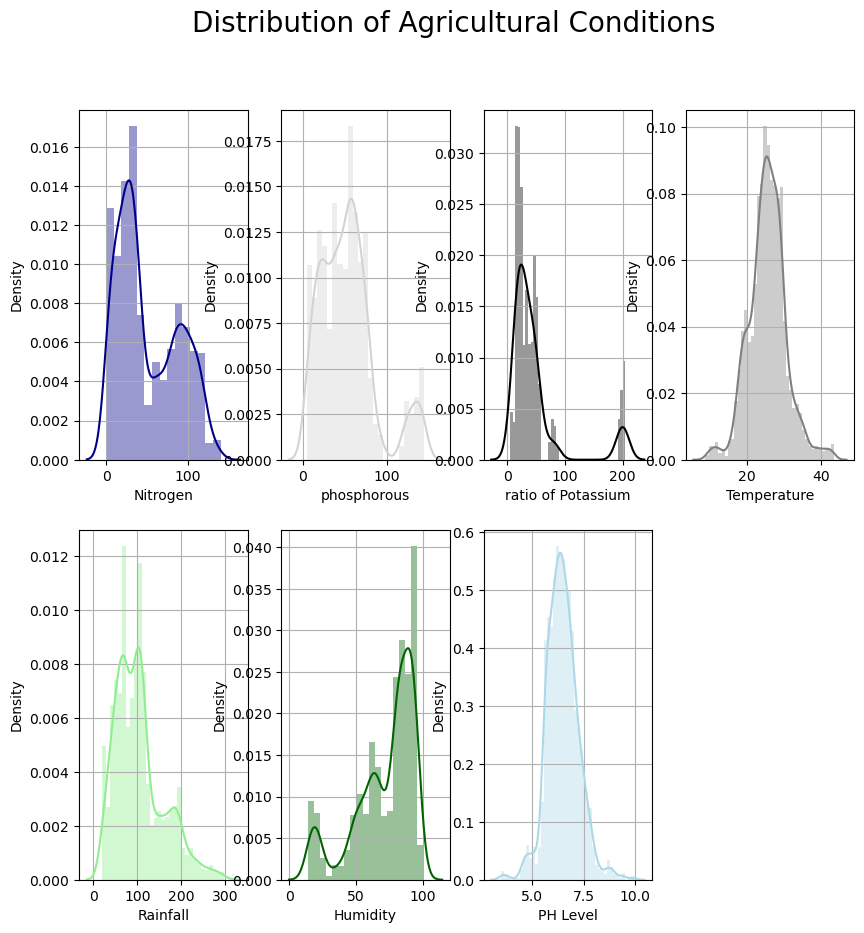

In [79]:
plt.subplot(2,4,1)
sns.distplot(data['N'], color = 'darkblue')
plt.xlabel('Nitrogen', fontsize=10)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'], color = 'lightgrey')
plt.xlabel('phosphorous', fontsize=10)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'], color = 'black')
plt.xlabel('ratio of Potassium', fontsize=10)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'], color = 'gray')
plt.xlabel('Temperature', fontsize=10)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'], color = 'lightgreen')
plt.xlabel('Rainfall', fontsize=10)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'], color = 'darkgreen')
plt.xlabel('Humidity', fontsize=10)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'], color = 'lightblue')
plt.xlabel('PH Level', fontsize=10)
plt.grid()


plt.suptitle('Distribution of Agricultural Conditions', fontsize=20)
plt.show()

F i n d i n g   S o m e   I n t e r e s t i n g   F a c t s

In [80]:
# finding some interesting facts

print('some interesting patterns')
print('-------------------------------------------------')
print('Crops which require very high Ratio of Nitrogen Content in soil :', data[data['N']>120]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Ratio of Phosphorous Content in soil :', data[data['P']>100]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Ratio of Potassium Content in soil :', data[data['K']>200]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Ratio of Rainfall Content in soil :', data[data['rainfall']>200]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very low Temperature :', data[data['temperature']<10]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high Temperature :', data[data['temperature']>40]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very low HUmidity :', data[data['humidity']<20]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very low PH :', data[data['ph']<4]['label'].unique())
print('-------------------------------------------------')
print('Crops which require very high PH :', data[data['ph']>9]['label'].unique())

some interesting patterns
-------------------------------------------------
Crops which require very high Ratio of Nitrogen Content in soil : ['cotton']
-------------------------------------------------
Crops which require very high Ratio of Phosphorous Content in soil : ['grapes' 'apple']
-------------------------------------------------
Crops which require very high Ratio of Potassium Content in soil : ['grapes' 'apple']
-------------------------------------------------
Crops which require very high Ratio of Rainfall Content in soil : ['rice' 'papaya' 'coconut']
-------------------------------------------------
Crops which require very low Temperature : ['grapes']
-------------------------------------------------
Crops which require very high Temperature : ['grapes' 'papaya']
-------------------------------------------------
Crops which require very low HUmidity : ['chickpea' 'kidneybeans']
-------------------------------------------------
Crops which require very low PH : ['mothbean

W h i c h   C r o p s   C a n   O n l y   b e   G r o w n   i n   S u m m e r ,  W i n t e r ,   a n d   R a i n y   S e a s o n

In [81]:
# Understanding which crops can on be grown in summer,winter season and rainy season

print('Summer Season Crops')
print(data[(data['temperature']>30) &(data['humidity']>50)]['label'].unique())
print('-------------------------------------------------')
print('Winter Season Crops')
print(data[(data['temperature']<20) &(data['humidity']>30)]['label'].unique())
print('-------------------------------------------------')
print('Rainy Season Crops')
print(data[(data['rainfall']>200) &(data['humidity']>30)]['label'].unique())

Summer Season Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------
Winter Season Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------
Rainy Season Crops
['rice' 'papaya' 'coconut']


🔍 Grouping Insights: Clustering Analysis 📊

In [82]:
from sklearn.cluster import KMeans

#Removing the label column cause there is no need of label in clustering
x = data.drop(['label'],axis=1)

#Selecting all the values of the data
x = x.values

print(x.shape)

(2200, 7)


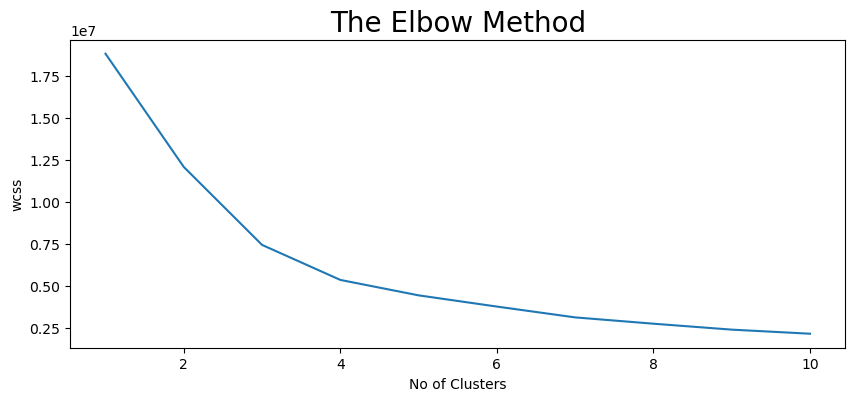

In [83]:
# determine the Optimum Number of Cluster withing dataset
plt.rcParams['figure.figsize']=(10,4)

wcss = []
for i  in range(1,11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    km.fit(x)
    wcss.append(km.inertia_)

#lets plot the results
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

Implementing KMeans for Clustering Analysis 📊

In [84]:
# implementing the KMeans algorithm to perform Clustering analysis

km=KMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_means = km.fit_predict(x)

#lets find out the Results
a = data['label']
y_means= pd.DataFrame(y_means)
z= pd.concat([y_means, a], axis =1)
z=z.rename(columns = {0: 'cluster'})

In [85]:
#let check the clusters of each Crops
print('Crops in First cluster : ', z[z['cluster']==0]['label'].unique())
print('------------------------------------------------------')
print('Crops in Second cluster : ', z[z['cluster']==1]['label'].unique())
print('------------------------------------------------------')
print('Crops in Third cluster : ', z[z['cluster']==2]['label'].unique())
print('------------------------------------------------------')
print('Crops in Fourth cluster : ', z[z['cluster']==3]['label'].unique())
print('------------------------------------------------------')

Crops in First cluster :  ['grapes' 'apple']
------------------------------------------------------
Crops in Second cluster :  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------
Crops in Third cluster :  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------
Crops in Fourth cluster :  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
------------------------------------------------------


🧠 Building Intelligence: Model Building 🏗️

In [86]:
y = data['label']
x = data.drop(['label'], axis = 1)

print('Shape of x: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of x:  (2200, 7)
Shape of Y:  (2200,)


In [87]:
# let create training and testing sets for validation of results

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('The Shape of x Train: ', x_train.shape)
print('The Shape of x Test: ', x_test.shape)
print('The Shape of y Train: ', y_train.shape)
print('The Shape of y Train: ', y_test.shape)

The Shape of x Train:  (1760, 7)
The Shape of x Test:  (440, 7)
The Shape of y Train:  (1760,)
The Shape of y Train:  (440,)


P r e d i c t i v e   M o d e l   L o g i s t i c   R e g r e s s i o n

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

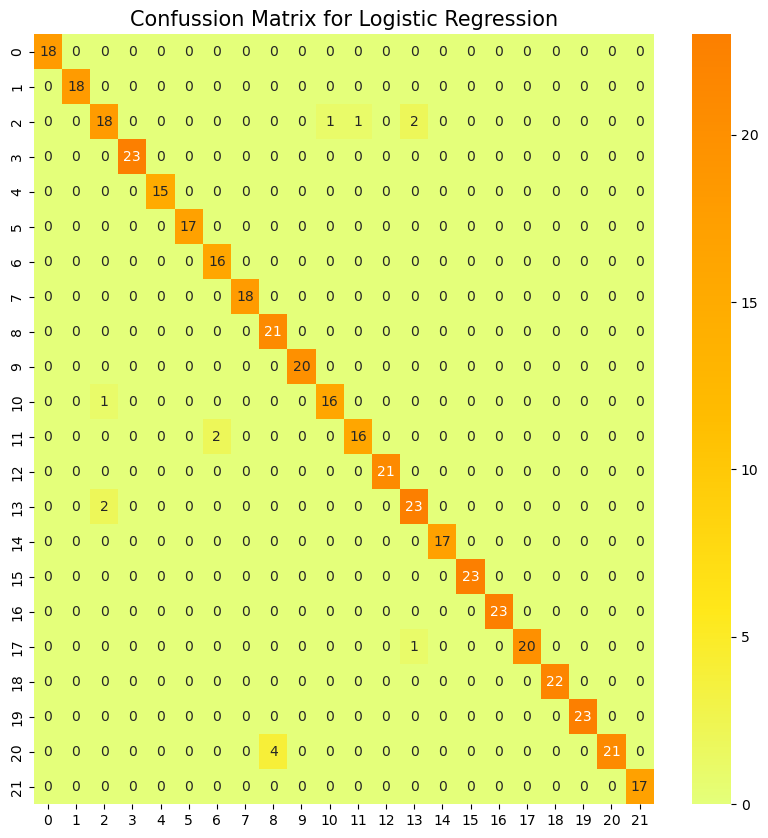

In [89]:
# lets Evalute the Model Performance
from sklearn.metrics import confusion_matrix

#lets print the confussion matrix first
plt.rcParams["figure.figsize"]=(10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True, cmap='Wistia')
plt.title('Confussion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [90]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9681818181818181
Precision: 0.9699452867394045
Recall: 0.9681818181818181
F1 Score: 0.9681168080082031


🔮 Required Prediction System 🔮

In [102]:
prediction = model.predict(np.array([[120,65,41,85,95,44,44]]))
print('The Suggested Crop for Given Climatic Condition is: ', prediction)

The Suggested Crop for Given Climatic Condition is:  ['mothbeans']
